<a href="https://colab.research.google.com/github/dharineeshramtp2000/Linear-Regression-OLS-vs-Gradient-Descent-/blob/master/Salary_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the libraries
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

#import the dataset
Dataset = pd.read_csv('Salary_Data.csv')
X = Dataset.iloc[:,0].values
y = Dataset.iloc[:,-1].values

#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )

X_train = np.array(X_train)
X_train = X_train.reshape(-1,1)

y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

In [7]:
#importing the linear regression models
from sklearn.linear_model import LinearRegression , SGDRegressor
# Creating the object instance for OLS(Ordinary Least Square Method)
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

#Predicting the output for our OLS Linear Model
y_pred1 = regressor1.predict(X_test.reshape(-1,1))

# Creating the object instance for SGD(Stochastic Gradient Descent)
regressor2 = SGDRegressor(max_iter=1000, tol=1e-3, alpha =0.001, random_state = 42, learning_rate = 'constant' , eta0 = 0.001)
regressor2.fit(X_train, y_train)

#Predicting the output for our SGD Linear Model
y_pred2 = regressor2.predict(X_test.reshape(-1,1))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


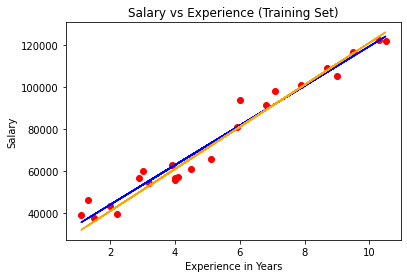

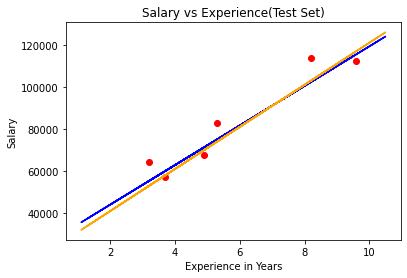

In [8]:
plt.scatter(X_train,y_train, color ='red')
plt.plot(X_train, regressor1.predict(X_train.reshape(-1,1)), color = 'blue')
plt.plot(X_train, regressor2.predict(X_train.reshape(-1,1)), color = 'orange')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.show()

# Graphical Representation of our models w.r.t the test set results
plt.scatter(X_test,y_test, color ='red')
plt.plot(X_train, regressor1.predict(X_train.reshape(-1,1)), color = 'blue')
plt.plot(X_train, regressor2.predict(X_train.reshape(-1,1)), color = 'orange')
plt.title('Salary vs Experience(Test Set)')
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.show()

Blue Line      ===============> OLS Linear Regressor

Orange Line    ===============> SGD Linear Regressor

In [9]:
# Now lets calculate the Coefficient of Determination
from sklearn.metrics import r2_score

#r2 for OLS model
r_squared1 = r2_score(y_test, y_pred1)

#r2 for OLS model
r_squared2 = r2_score(y_test, y_pred2)

print("Coeffiecient of Determination for OLS linear model= ", r_squared1)
print("Coeffiecient of Determination for SGD linear model= ", r_squared2)

Coeffiecient of Determination for OLS linear model=  0.9024461774180497
Coeffiecient of Determination for SGD linear model=  0.8869256859580719


Hence we can find that the CoD for both **OLS** and  **SGD** is almost the same.
Hence for a small and evenly distributed dataset , the **OLS** and **SGD** almost perform a good prediction. The **SGD** model can be further improved by tuning the parameters like learning_rate, alpha, max_iter and so on.

